## Problem statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
from glob import glob
import seaborn as sns
import pandas as pd
import numpy as np
import PIL
import cv2
import os

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = Path(Path.cwd().parents[2]/'Skin cancer'/'Train')
data_dir_test = Path(Path.cwd().parents[2]/'Skin cancer'/'Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
#     labels='inferred',
#     label_mode='categorical',
    color_mode='rgb',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
#     labels='inferred',
#     label_mode='categorical',
    color_mode='rgb',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir_test,
# #     labels='inferred',
# #     label_mode='categorical',
#     color_mode='rgb',
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size)

In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [10]:
# ### your code goes here, you can use training or validation data to visualize

# num_of_classes = 9
# plot_count = 0

# plt.figure(figsize=(30, 25))

# for images, labels in train_ds:
#     for index, label in enumerate(labels.numpy()):
#         if label[plot_count] == 1:
#             ax = plt.subplot(3, 3, plot_count+1)
#             plt.imshow(images[plot_count].numpy().astype("uint8"))
#             plt.title(class_names[plot_count])
#             plt.axis("off")
#             plot_count += 2
#             break
#         else:
#             continue
#     if plot_count==num_of_classes:
#         break

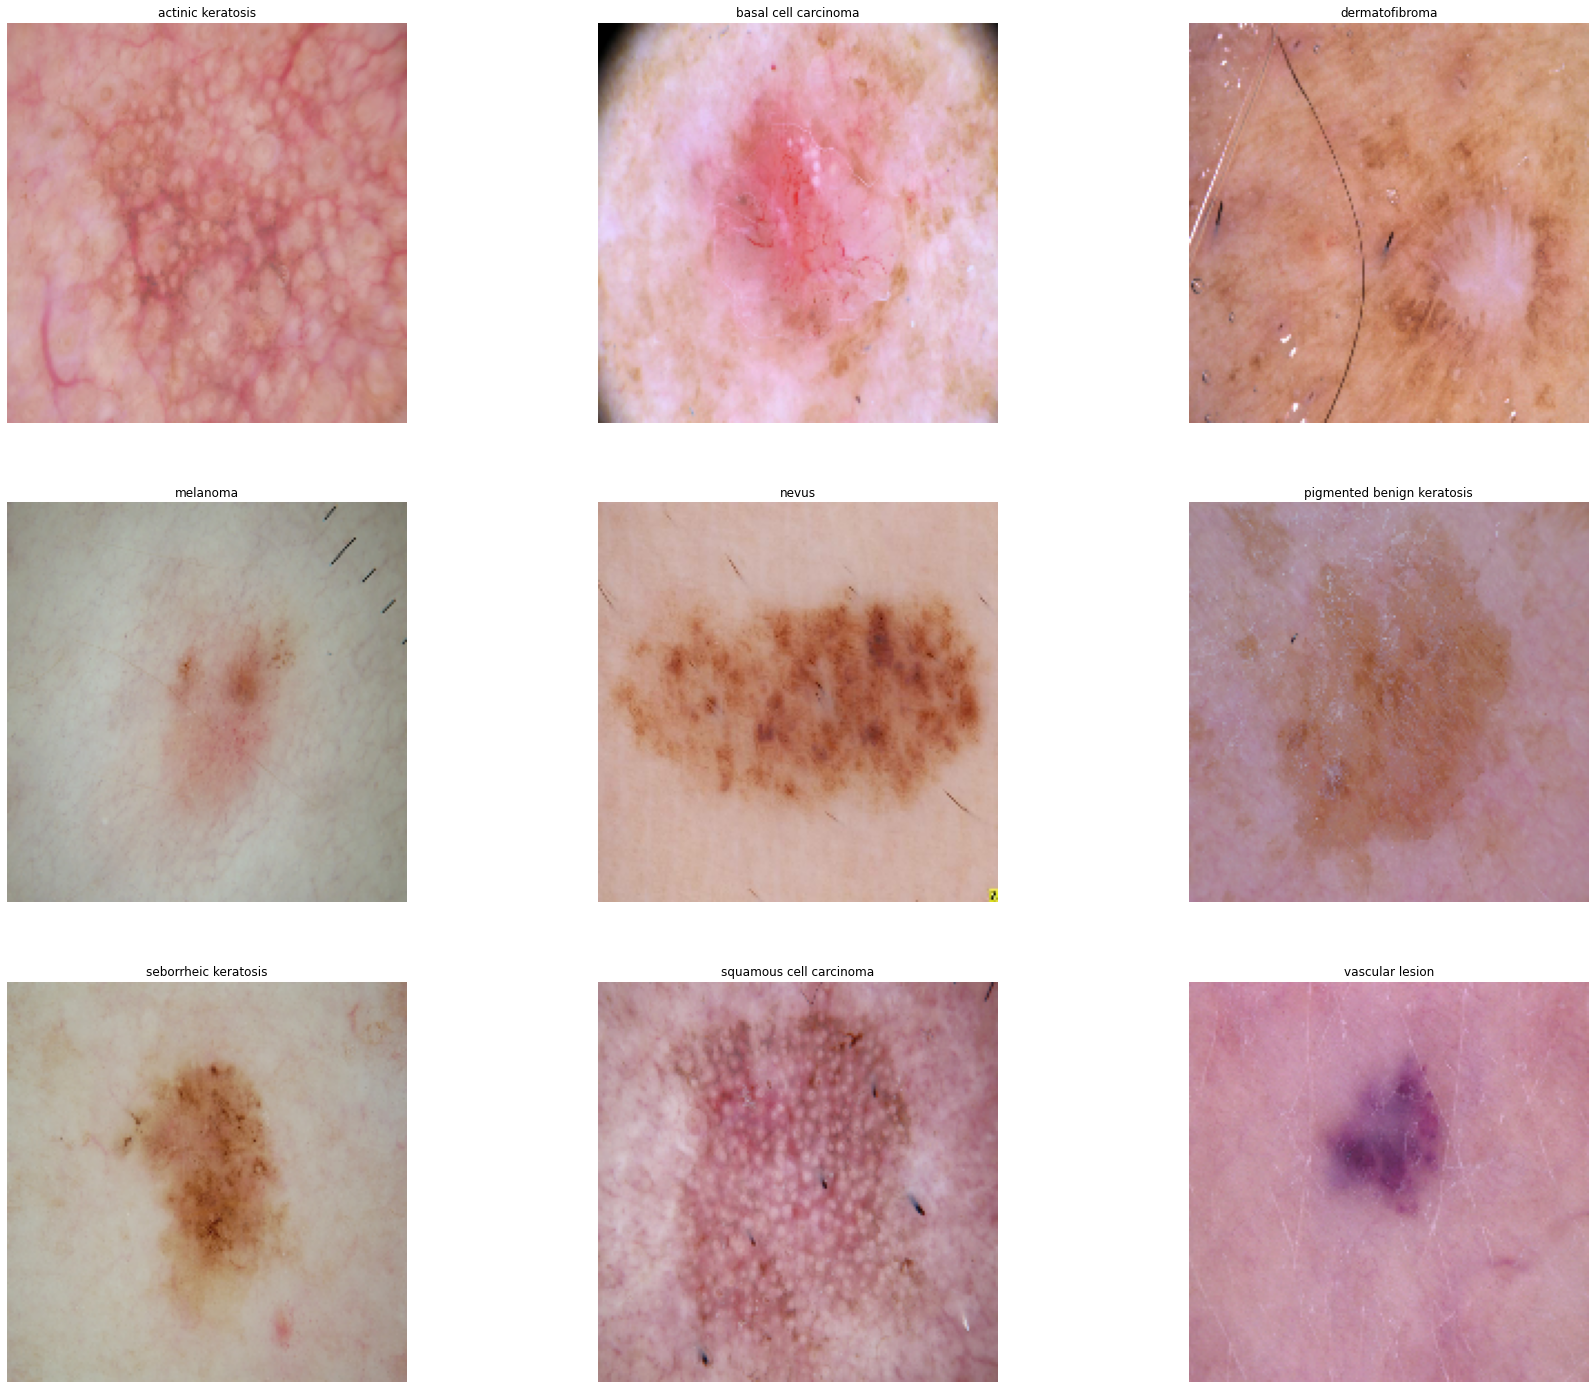

In [11]:
### your code goes here, you can use training or validation data to visualize

class_count = 0
num_of_classes = 9

plt.figure(figsize=(30, 25))

while class_count < num_of_classes:
    for images, labels in train_ds:
        count = 0 
        for label in labels.numpy():
            count += 1
            if label==class_count:
                ax = plt.subplot(3, 3, label+1)
                plt.imshow(images[count-1].numpy().astype("uint8"))
                plt.title(class_names[labels[count-1]])
                plt.axis("off")
                class_count += 1
                break

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
num_classes = 9
model = Sequential([
                    layers.Rescaling(scale=1./255., input_shape = (180, 180, 3))
])

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(num_classes, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function

optimizer = 'adam'
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(),

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 15s 99ms/step - loss: 2.0395 - accuracy: 0.1959 - val_loss: 1.9889 - val_accuracy: 0.2215
Epoch 2/20
56/56 [==============================] - 4s 67ms/step - loss: 1.8793 - accuracy: 0.3002 - val_loss: 1.9011 - val_accuracy: 0.3020
Epoch 3/20
56/56 [==============================] - 4s 68ms/step - loss: 1.6872 - accuracy: 0.3890 - val_loss: 1.6039 - val_accuracy: 0.4295
Epoch 4/20
56/56 [==============================] - 4s 69ms/step - loss: 1.6212 - accuracy: 0.4258 - val_loss: 1.8774 - val_accuracy: 0.3199
Epoch 5/20
56/56 [==============================] - 4s 67ms/step - loss: 1.5775 - accuracy: 0.4420 - val_loss: 1.5107 - val_accuracy: 0.4609
Epoch 6/20
56/56 [==============================] - 4s 68ms/step - loss: 1.4523 - accuracy: 0.4782 - val_loss: 1.5052 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 4s 73ms/step - loss: 1.4261 - accuracy: 0.5006 - val_loss: 1.4504 - val_accuracy: 0.5078
Epoch 8/20
5

### Visualizing training results

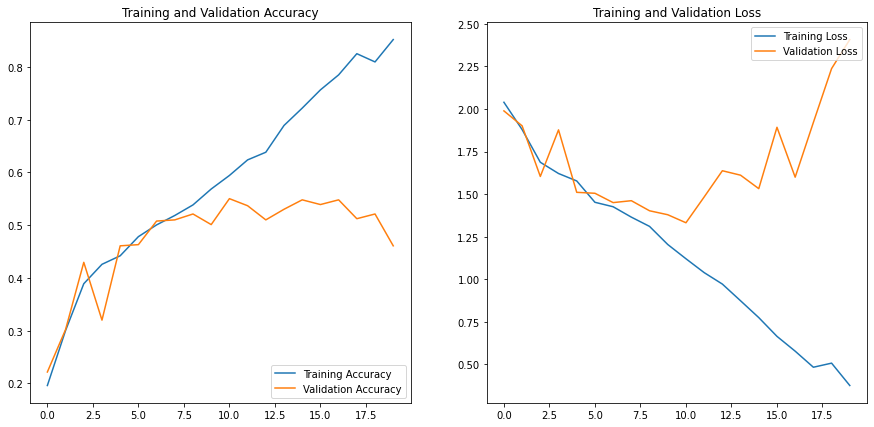

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# model.evaluate(test_ds)

In [18]:
# predicted = model.predict(test_ds)
# predicted

In [19]:
# np.round(predicted[0], 2)

In [20]:
# class_names[np.argmax(predicted[0])]

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

The model is overfitting. After the 8th Epoc, training accuracy keeps increasing whereas the validation accuracy starts to occilate between 0.48 to 0.52. We can clearly see that the validation loss decreasing upto 7 Epocs then it starts to increase where as incase of the training loss it keeps on decreasing which is the clear sign of overfitting

In [30]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = tf.keras.Sequential([
        #layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomFlip("vertical"),
        #layers.RandomHeight(0.2),
        #layers.RandomWidth(0.2)
])

In [22]:
# imgs_labels = iter(train_ds)
# img, label = next(imgs_labels)
# image = img[0]/255.
# plt.imshow(image)
# plt.title(class_names[label.numpy()[0]])
# plt.axis('off')
# plt.show()

In [23]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

melanoma_imgs_path = list(data_dir_train.glob('melanoma/*.jpg'))

In [24]:
# PIL.Image.open(str(melanoma_imgs_path[5]))

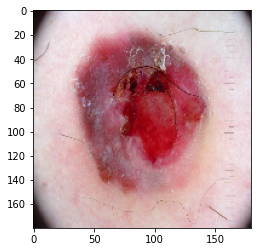

In [25]:
img = cv2.imread(str(melanoma_imgs_path[6]))
img = cv2.resize(img, (180,180))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Augumentation testing

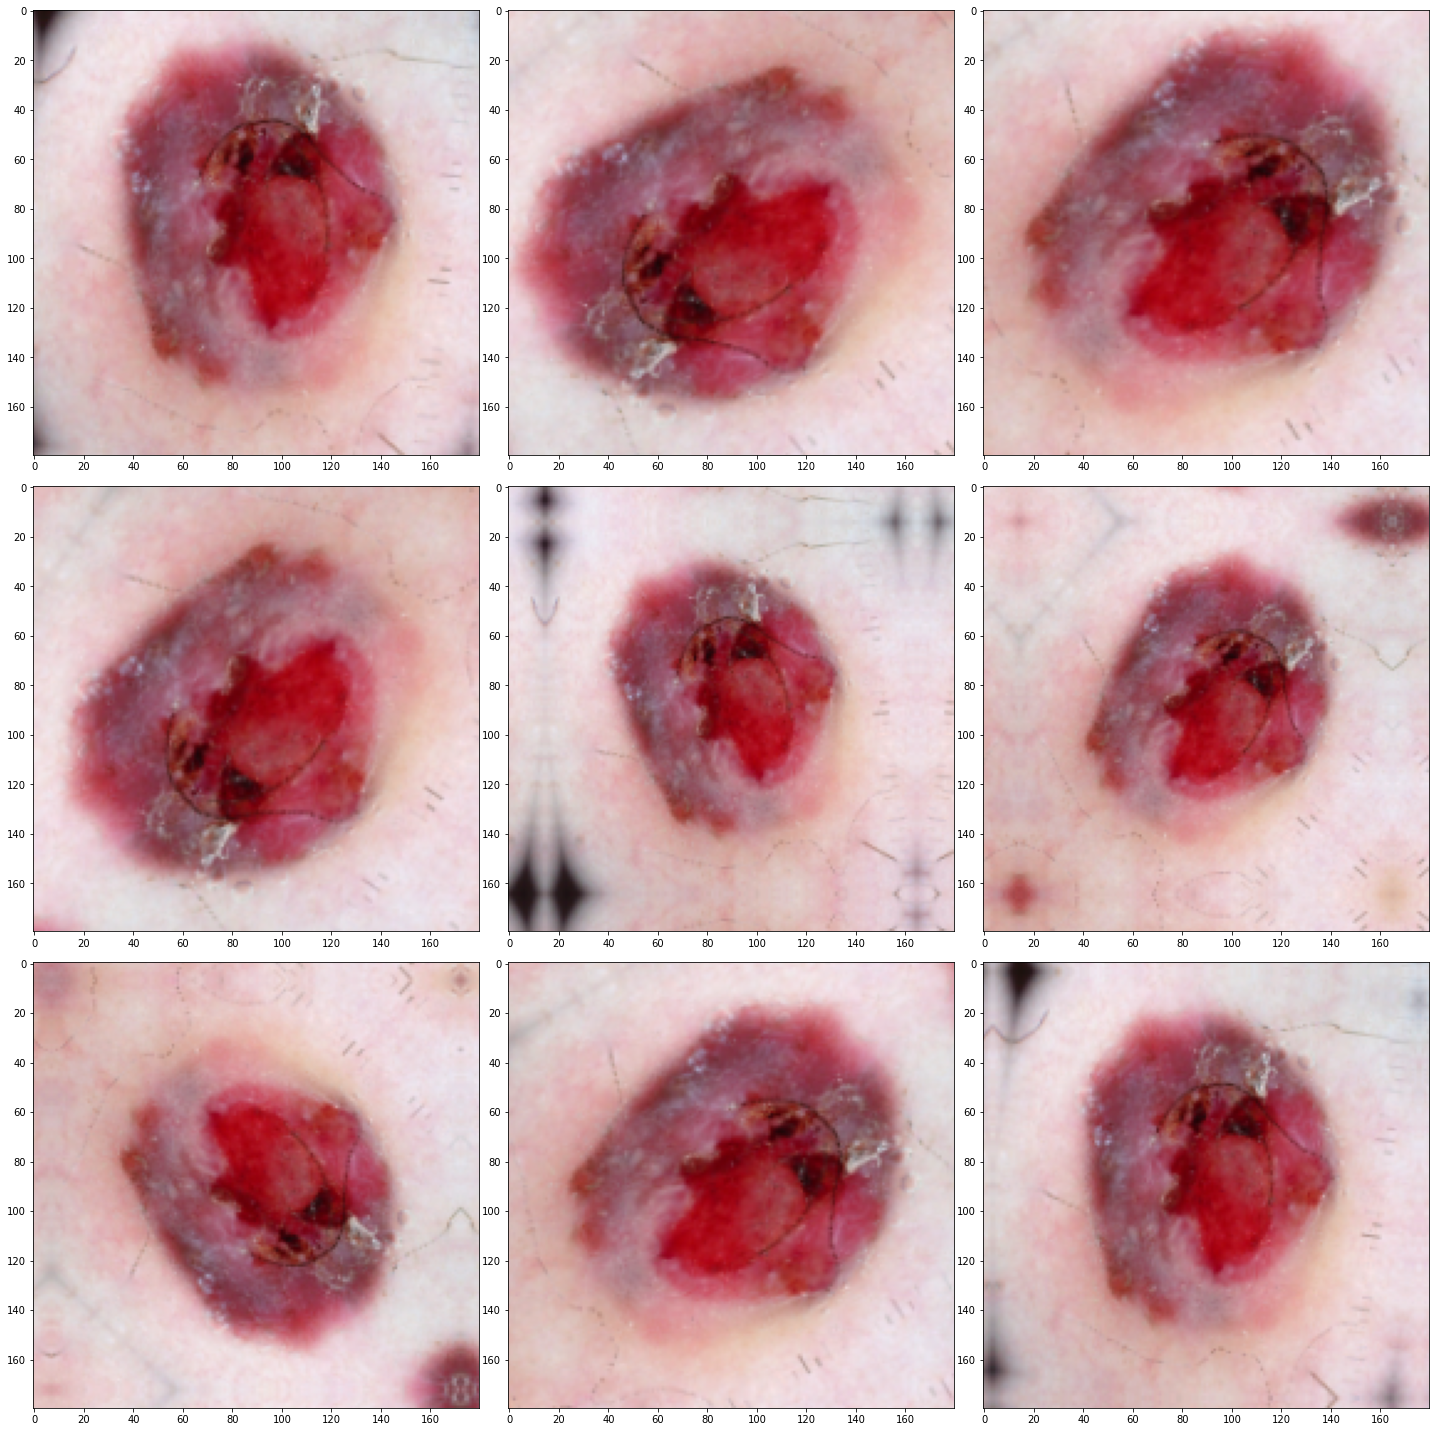

In [26]:
# Let's test our augumentation function

scaled_img = img/255.

fix, axes = plt.subplots(3, 3, figsize=(20,20))
axes = axes.flatten()

for ax in axes:
    augumented_img =  data_augmentation(scaled_img, training=True)
    ax.imshow(augumented_img)
    #ax.axis('off')
plt.tight_layout()
plt.show()

### Todo:
### Create the model, compile and train the model


In [31]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
### Your code goes here
num_classes = 9
model = Sequential([   
    layers.Rescaling(scale=1./255., input_shape = (180, 180, 3)),
    data_augmentation
])

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(num_classes, activation = "softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 32)        9248      
                                                      

### Compiling the model

In [32]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function

optimizer = 'adam'
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(),

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

### Training the model

In [33]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 111ms/step - loss: 2.0633 - accuracy: 0.2059 - val_loss: 2.0533 - val_accuracy: 0.2282
Epoch 2/20
56/56 [==============================] - 6s 105ms/step - loss: 1.9090 - accuracy: 0.2812 - val_loss: 1.8485 - val_accuracy: 0.3848
Epoch 3/20
56/56 [==============================] - 6s 103ms/step - loss: 1.7503 - accuracy: 0.3627 - val_loss: 1.7090 - val_accuracy: 0.4139
Epoch 4/20
56/56 [==============================] - 6s 108ms/step - loss: 1.6294 - accuracy: 0.4023 - val_loss: 1.5465 - val_accuracy: 0.4430
Epoch 5/20
56/56 [==============================] - 6s 108ms/step - loss: 1.6288 - accuracy: 0.4263 - val_loss: 1.6006 - val_accuracy: 0.4497
Epoch 6/20
56/56 [==============================] - 6s 106ms/step - loss: 1.5356 - accuracy: 0.4509 - val_loss: 1.4852 - val_accuracy: 0.4564
Epoch 7/20
56/56 [==============================] - 6s 101ms/step - loss: 1.5442 - accuracy: 0.4520 - val_loss: 1.4730 - val_accuracy: 0.4966
Epoch 

### Visualizing the results

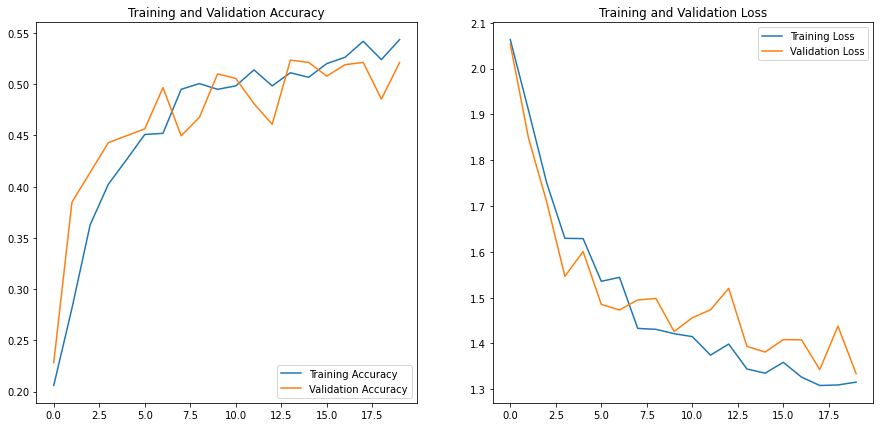

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Its evident that model is not overfitting now but it is underfitting as both the training and validation accuracy is around 0.50

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [35]:
## Your code goes here.

class_distribution = {}

for class_name in class_names:
    path = data_dir_train/class_name
    class_distribution[class_name] = len(list(path.glob('*.jpg')))

class_distribution

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

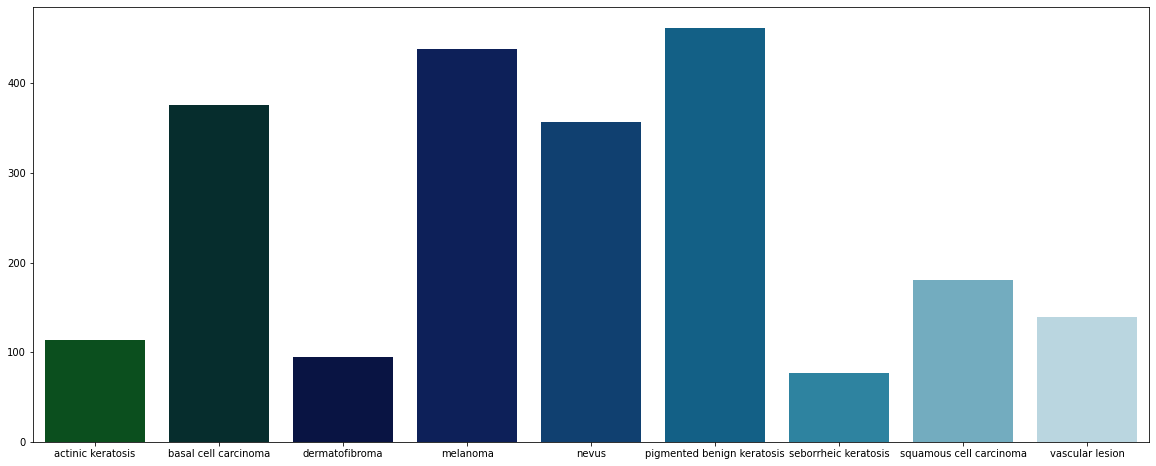

In [36]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), palette='ocean')
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

ANS: seborrheic keratosis, it has only 77 samples

#### - Which classes dominate the data in terms proportionate number of samples?

ANS: pigmented benign keratosis, it has 462 samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [37]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


D:\Program Files\Python310\python.exe: No module named pip


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [38]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
       if not os.path.exists(path_to_training_dataset/i/'output'):
            p = Augmentor.Pipeline(path_to_training_dataset/i)
            p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
            p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to E:\Applications\Git\deep_learning\Skin cancer\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x22D556AFB20>: 100%|█| 500/500 [00:04<00:


Initialised with 376 image(s) found.
Output directory set to E:\Applications\Git\deep_learning\Skin cancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22D5570F010>: 100%|█| 500/500 [00:02<00:00, 221.53 Samples


Initialised with 95 image(s) found.
Output directory set to E:\Applications\Git\deep_learning\Skin cancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22D5561C790>: 100%|█| 500/500 [00:02<00:00, 211.15 Samples


Initialised with 438 image(s) found.
Output directory set to E:\Applications\Git\deep_learning\Skin cancer\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22D557257B0>: 100%|█| 500/500 [00:11<00:00, 42.18 Samples


Initialised with 357 image(s) found.
Output directory set to E:\Applications\Git\deep_learning\Skin cancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x22D54FA4FD0>: 100%|█| 500/500 [00:08<00:00, 59.47 Samples/


Initialised with 462 image(s) found.
Output directory set to E:\Applications\Git\deep_learning\Skin cancer\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x22D556494B0>: 100%|█| 500/500 [00:02<00:


Initialised with 77 image(s) found.
Output directory set to E:\Applications\Git\deep_learning\Skin cancer\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22D54FC9240>: 100%|█| 500/500 [00:05<00:00, 89.37 Samples


Initialised with 181 image(s) found.
Output directory set to E:\Applications\Git\deep_learning\Skin cancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22D556481C0>: 100%|█| 500/500 [00:02<00:00, 220.07 Samples


Initialised with 139 image(s) found.
Output directory set to E:\Applications\Git\deep_learning\Skin cancer\Train\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x22D556981C0>: 100%|█| 500/500 [00:02<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [39]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
## Your code goes here.

class_distribution = {}

for class_name in class_names:
    path = data_dir_train/class_name
    class_distribution[class_name] = len(list(path.glob('*.jpg')))
    path = data_dir_train/class_name/'output'
    class_distribution[class_name] += len(list(path.glob('*.jpg')))

class_distribution

{'actinic keratosis': 614,
 'basal cell carcinoma': 876,
 'dermatofibroma': 595,
 'melanoma': 938,
 'nevus': 857,
 'pigmented benign keratosis': 962,
 'seborrheic keratosis': 577,
 'squamous cell carcinoma': 681,
 'vascular lesion': 639}

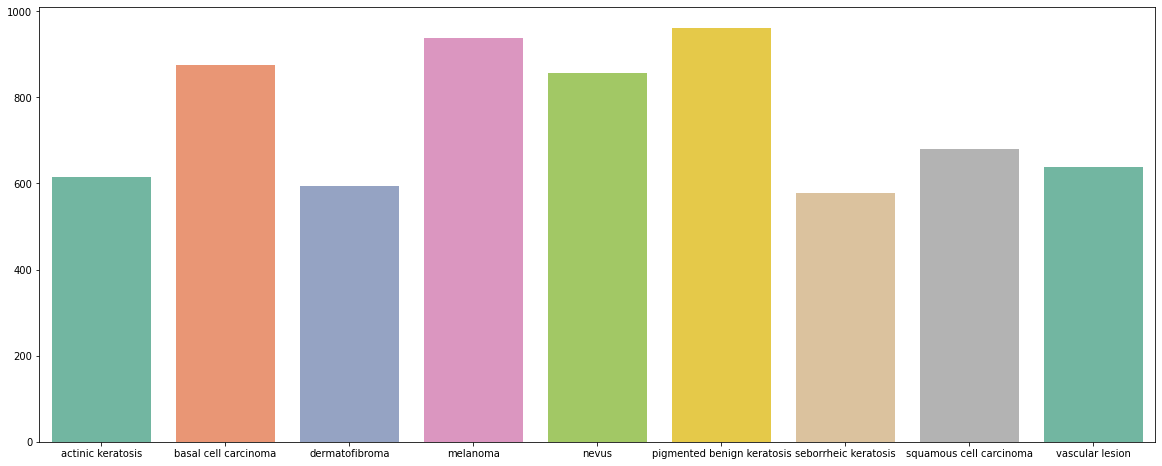

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), palette='Set2')
plt.show()

In [42]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['E:\\Applications\\Git\\deep_learning\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_083f9c62-da28-453c-9168-1b3811b05a96.jpg',
 'E:\\Applications\\Git\\deep_learning\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_29c84c26-32e3-4470-b99e-e00e0dd20e96.jpg',
 'E:\\Applications\\Git\\deep_learning\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6ddff5b2-0352-48e5-bfdd-d6240a9e7660.jpg',
 'E:\\Applications\\Git\\deep_learning\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9a5cda40-e76d-4fe6-a9c9-24ed28799950.jpg',
 'E:\\Applications\\Git\\deep_learning\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_de79af50-ecd3-4415-9f4c-e7ac04b0ffd2.jpg',
 'E:\\Applications\\Git\\deep_learning\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg

In [43]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [44]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [45]:
len(dataframe_dict_new)

4500

In [46]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [47]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [48]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [49]:
data_dir_train = data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
# num_classes = 9
# model = Sequential([ 
#                     layers.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
# ])
# model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.35))

# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.50))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.50))
# model.add(Dense(num_classes, activation = "softmax"))
# model.summary()

In [54]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
### Your code goes here
num_classes = 9
model = Sequential([   
    layers.Rescaling(scale=1./255., input_shape = (180, 180, 3))
])

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.50))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(num_classes, activation = "softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_3 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [55]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function

optimizer = 'adam'
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(),

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])


#### **Todo:**  Train your model

In [56]:
## Your code goes here, note: train your model for 20 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 12s 62ms/step - loss: 3.9180 - accuracy: 0.2272 - val_loss: 32.8239 - val_accuracy: 0.1084
Epoch 2/30
169/169 [==============================] - 11s 62ms/step - loss: 1.8068 - accuracy: 0.3142 - val_loss: 28.6973 - val_accuracy: 0.1084
Epoch 3/30
169/169 [==============================] - 11s 62ms/step - loss: 1.6826 - accuracy: 0.3503 - val_loss: 15.0973 - val_accuracy: 0.1856
Epoch 4/30
169/169 [==============================] - 11s 63ms/step - loss: 1.6194 - accuracy: 0.3756 - val_loss: 9.2445 - val_accuracy: 0.2123
Epoch 5/30
169/169 [==============================] - 11s 64ms/step - loss: 1.5148 - accuracy: 0.4123 - val_loss: 4.6242 - val_accuracy: 0.3549
Epoch 6/30
169/169 [==============================] - 11s 65ms/step - loss: 1.4447 - accuracy: 0.4410 - val_loss: 4.2464 - val_accuracy: 0.3593
Epoch 7/30
169/169 [==============================] - 11s 64ms/step - loss: 1.3299 - accuracy: 0.4935 - val_loss: 5.2927 - val_accura

#### **Todo:**  Visualize the model results

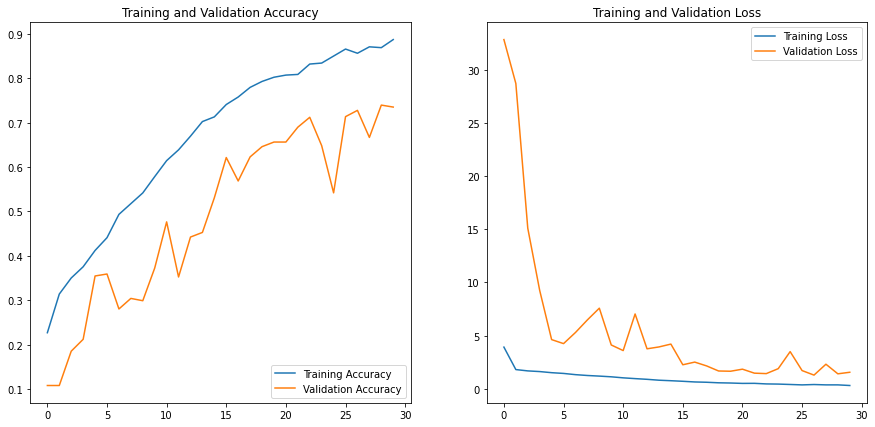

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Accuracy has got increased after including the augumented samples using Augmentor library.

- Model performance is somewhat good, but still it is overfitting.
- Hyperparameter tuning is required.
- Need to add more convolution layers to the model with appropriate measures for overfitting.
- Need to add more samples or create samples by augumentation methods.
- Need to build the model for more Epocs.